In [17]:
import matplotlib.pyplot as plt
import numpy as np
import collections

fasta= open("data.fastq")
lines=fasta.readlines()
reads=[]
qualities=[]

for i in range(0,len(lines),4):
    reads.append(lines[i+1].rstrip())
    qualities.append(lines[i+3].rstrip())


def phretoQ(phre):
    return ord(phre)-33

##Task 1

####Per base sequence quality

[31.0298, 31.3848, 31.5914, 35.0838, 34.7668, 34.8122, 34.81, 34.7646, 36.2818, 36.334, 36.3334, 36.2506, 36.1984, 37.5768, 37.493, 37.4894, 37.3964, 37.1994, 37.3314, 37.4272, 37.3776, 37.4134, 37.2744, 37.296, 36.8476, 36.9622, 36.829, 37.0194, 36.7312, 36.715, 36.7926, 36.6576, 36.5998, 36.4704, 36.4756, 36.5284, 36.435, 36.4918, 36.3098, 36.336, 36.312, 36.2148, 36.0932, 36.052, 36.0944, 35.8736, 36.326, 36.1628, 36.0456, 35.9896, 35.7832, 35.7694, 35.8126, 35.618, 35.6818, 35.4422, 35.3288, 35.2782, 34.9286, 34.7336, 34.6898, 34.6116, 34.5026, 34.5056, 34.2886, 34.1586, 33.9122, 33.6362, 33.259, 33.4296, 33.1676, 32.9288, 32.7856, 32.689, 32.4198, 30.7226, 31.7286, 32.235, 32.29, 32.4362, 32.283, 32.4448, 32.317, 32.1646, 32.044, 31.935, 31.5882, 31.8024, 31.7394, 31.6856, 31.2978, 31.4292, 31.3622, 31.3596, 31.2878, 31.2482, 31.3318, 31.1646, 31.1896, 31.0806]
[31, 33, 34, 37, 37, 37, 37, 37, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 

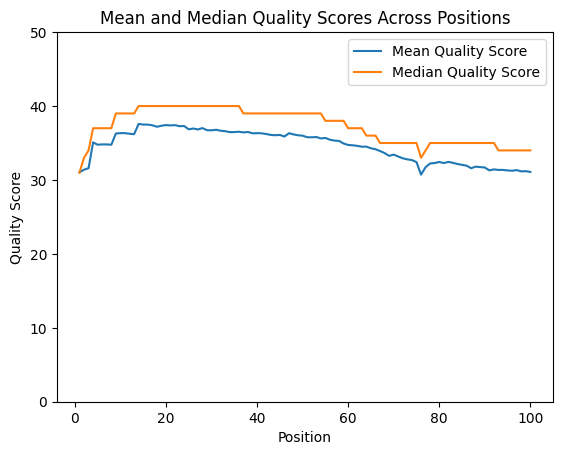

In [3]:
Score=[]
listofmedians=[]
listofmeans=[]

for i in range(0,len(qualities[0])):
    for j in range(0,len(qualities)):
        q=phretoQ(qualities[j][i])
        Score.append(q)
    Score=sorted(Score)
    if len(Score) % 2 != 0:
        median = int(len(Score) / 2)
    else:
        m1 = int(len(Score) / 2)
        m2 = int(len(Score) / 2)-1
        median = int((m1 + m2) / 2)
    mean= sum(Score) / len(Score)
    listofmedians.append(Score[median])
    listofmeans.append(mean)
    Score=[]

print(listofmeans)
print(listofmedians)

# Plotting
positions = range(1, len(qualities[0]) + 1)
plt.plot(positions, listofmeans, label='Mean Quality Score')
plt.plot(positions, listofmedians, label='Median Quality Score')
plt.title('Mean and Median Quality Scores Across Positions')
plt.xlabel('Position')
plt.ylabel('Quality Score')
plt.legend()
plt.yticks(np.arange(0, 60, 10))
plt.show()


##Task 2

####Per sequence quality scores


[34.89, 36.17, 34.48, 33.68, 34.23, 35.29, 34.15, 34.63, 34.68, 36.21, 34.61, 34.68, 34.07, 35.12, 35.51, 33.95, 34.89, 34.28, 34.02, 34.72, 33.83, 33.66, 35.09, 33.21, 34.8, 35.28, 34.5, 35.47, 35.37, 33.91, 35.39, 34.21, 34.67, 35.6, 34.16, 34.3, 34.01, 34.99, 34.74, 33.92, 34.88, 33.72, 35.39, 33.7, 33.96, 34.42, 35.01, 34.47, 35.33, 34.85, 34.26, 35.18, 34.87, 34.35, 33.19, 35.81, 33.83, 34.55, 35.47, 34.84, 34.74, 34.86, 34.35, 34.2, 34.59, 32.99, 34.46, 33.8, 34.43, 35.83, 34.72, 35.57, 34.06, 35.05, 35.02, 34.12, 35.46, 34.35, 34.96, 34.76, 34.26, 34.34, 33.79, 34.26, 33.6, 34.28, 35.04, 35.07, 34.16, 33.51, 34.58, 34.34, 35.46, 34.11, 33.4, 35.59, 35.19, 34.14, 34.6, 34.72, 34.95, 35.54, 35.78, 34.41, 33.37, 33.46, 34.29, 34.36, 34.43, 35.34, 35.54, 34.65, 35.56, 35.43, 35.09, 33.64, 34.54, 33.44, 35.27, 34.02, 35.67, 34.78, 35.26, 33.9, 34.45, 36.06, 35.54, 33.61, 34.61, 34.81, 32.88, 34.09, 36.08, 34.52, 35.19, 35.18, 35.97, 34.56, 33.58, 34.7, 36.01, 34.47, 34.75, 34.12, 34.

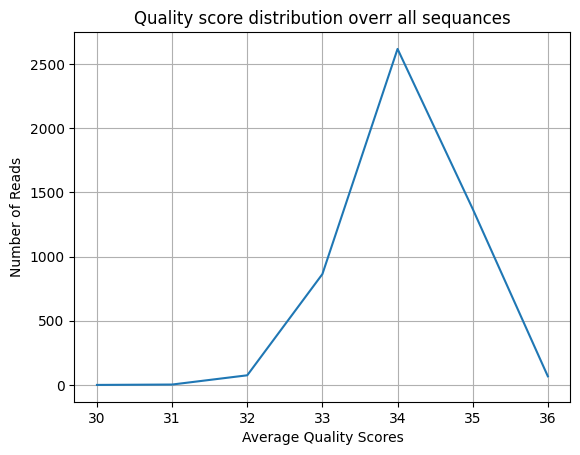

In [31]:
listOfAverage = []


for i in range(len(reads)):
    score = 0
    for j in qualities[i]:
        score = score + phretoQ(j)
    # Calculate the average qualit
    listOfAverage.append(score / len(qualities[i]))

print(listOfAverage,'\n')
# Change each element in the list to integer
listOfAverage = [int(i) for i in listOfAverage]

# Count the occurrences of each average quality score using numpy's bincount function
counts = np.bincount(listOfAverage)

# Plot the quality score distribution for quality scores between 30 and 36
plt.plot(range(30, 37), counts[30:37])
plt.xlabel('Average Quality Scores')
plt.ylabel('Number of Reads')
plt.title('Quality score distribution overr all sequances')
plt.grid(True)
plt.show()


## Task 3

####Per base sequence content

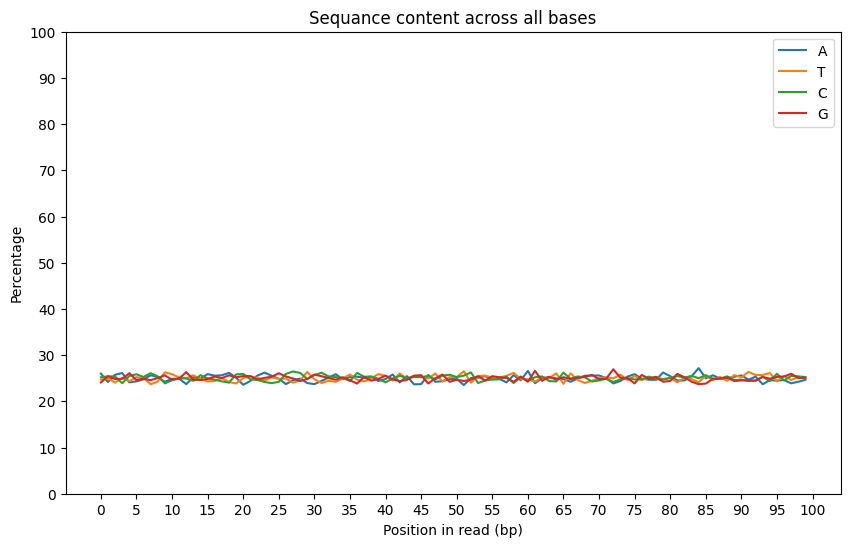

In [33]:
percentage_A = []
percentage_T = []
percentage_C = []
percentage_G = []

for i in range(len(reads[0])):

    sum_A = sum_T = sum_C = sum_G = 0

    for j in range(len(reads)):
        if reads[j][i] == "A":
            sum_A += 1
        elif reads[j][i] == "T":
            sum_T += 1
        elif reads[j][i] == "C":
            sum_C += 1
        elif reads[j][i] == "G":
            sum_G += 1

    # Calculate percentage of each base
    total_bases = sum_A + sum_T + sum_C + sum_G
    percentage_A.append((sum_A / total_bases) * 100)
    percentage_T.append((sum_T / total_bases) * 100)
    percentage_C.append((sum_C / total_bases) * 100)
    percentage_G.append((sum_G / total_bases) * 100)

# Plotting
index_positions = range(len(reads[0]))
plt.figure(figsize=(10, 6))
plt.plot(index_positions, percentage_A, label='A')
plt.plot(index_positions, percentage_T, label='T')
plt.plot(index_positions, percentage_C, label='C')
plt.plot(index_positions, percentage_G, label='G')

plt.title('Sequance content across all bases')
plt.xlabel('Position in read (bp)')
plt.ylabel('Percentage')
plt.legend()
plt.yticks(np.arange(0, 110, 10))
plt.xticks(np.arange(0, 105, 5))
plt.show()


## Task 4

Sequence Duplication Levels


Counter({'TAAGTCCTGCATCTGATTGATCGAGTGACAGTCAAAGTTAGCATACTATTAGCACATATCGACATATGGGCCTCATATTCCCTCTAATCTATTGGCGTTG': 2, 'GGTGTTCACTCAGTGTAGGACTCTCGTTGGTCTCCGACTAAGACTGCGATTATGAGGAGCGAAAGGCCTAGTCGCAAATAGTTGTTTTACCTCGCTCTTT': 1, 'TAACCTCTGATCTGGCCAAATCAACTAGACAACATTGACGTCAAAAACATGCGCCACTGAACCATATCCCTAGGCATCGATTCAGCTTCTTTAACATGTT': 1, 'GTGGCCCGCCGCTTGTAGTGTCAAATGTAAGAAATGATTACCGATACTTGCATGAATAATGGATTACGGACATACGAGTTATATTGCACGTTTGCGTTTA': 1, 'CAGAGACTAACGGACATAATTCGCCGCCCAGTCTTCGAACAACTACCTATCTGTCGGTTTCAAGTCGAAAGGTCTCTCGCCTTCCAGAAGGGTGAAGCAG': 1, 'GTTATCCCATGAGATTGATACCCACTTCCTGACTTTTGCGTACAGACAGAAAAGATGAGATAGCTCATGGCACAGCCGACTCATTTTAGCCGTTCCAAAT': 1, 'GCCTTCCGAATCTTCGGAATCCCTAGGAATGAGCTTATTCCGTTTCGCACTACGGTGCCGCCAAATTTTACGTCTGCGAGAATAATTGTACTTCGACGAA': 1, 'TCATGGCCCTCCCGAGTGTCATAGTGAACTTATGACCTGAGCGGGAACTAGCGTGTAGCACACCCACGAACGGTTGGGGACAGTTGGTCGCCTGTTGTCT': 1, 'GATACCCTACCATCAACTCATTCTTACCACATTCTTTGGGGCTATGTGTGAAAGGCTCCGTTTCACGCCCCCCATTAGACTCGCCGATCCAACGTAGTTT': 1, 'CTAGGCGGAGGTTTACCAAACCGTGCC

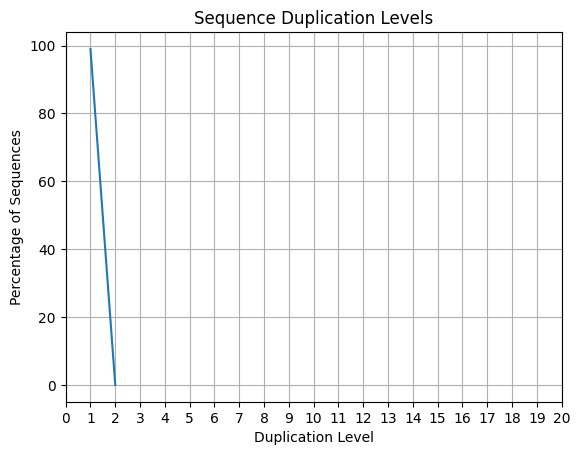

In [35]:
# Count occurrences of each sequence
sequence_counts = collections.Counter(reads)

# Count occurrences of each duplication level
duplication_levels = collections.Counter(sequence_counts.values())

print(sequence_counts)

# Calculate total sequences
total_sequences = len(reads)

# Calculate percentages
percentage_sequences = [(level, int(count / total_sequences * 100)) for level, count in duplication_levels.items()]

# Sort by duplication level
percentage_sequences.sort(key=lambda x: x[0])

# Plotting
duplication_levels, percentages = zip(*percentage_sequences)
plt.plot(duplication_levels, percentages)
plt.xlabel('Duplication Level')
plt.ylabel('Percentage of Sequences')
plt.title('Sequence Duplication Levels')
plt.xticks(np.arange(0, 21, 1))
plt.grid()
plt.show()